In [1]:
# homework 2's A1, A2
import numpy as np
import scipy.integrate

# output-decimal
np.set_printoptions(precision=10, suppress=True)

# 1st order rhs
def rhsfunc(x, y, ep):
    return np.array([y[1], (x**2 - ep) * y[0]])

# variables
K = 1
L = 4
tol = 1e-6
initial_eps = 0
x_vals = np.linspace(-L, L, 20*L + 1)
max_iter = 1000     #prepare for 1,000 iteration

# for storing eigenstuffs
eigenvalues = []
eigenfunctions = []

# finding eigen. in 5 modes
for mode in range(5):
    epsilon = initial_eps   # reset eps
    delta_eps = K / 100     # initial time step
    y0 = np.array([0.1, np.sqrt(K*L**2 - epsilon)])  # assumption for initial conditions

    # find eigen.
    for i in range(max_iter):
        sol = scipy.integrate.solve_ivp(lambda x, y: rhsfunc(x, y, epsilon), [-L, L], y0, t_eval=x_vals)
        phi = sol.y[0]
        phi_deriv = sol.y[1]

        # normalize
        phi_norm = phi / np.sqrt(np.trapz(phi**2, x_vals))

        # converge?
        boundary_cond = phi_deriv[-1] + np.sqrt(K*L**2 - epsilon) * phi[-1]
        if np.abs(boundary_cond) < tol:
            eigenvalues.append(epsilon)
            eigenfunctions.append(np.abs(phi_norm))  # take absolute value
            break

        # adjust epsilon according to boundary_cond
        if (-1)**mode * boundary_cond > 0:
            epsilon += delta_eps
        else:
            epsilon -= delta_eps / 2
            delta_eps /= 2

        # update initial condition
        y0 = np.array([1, np.sqrt(K*L**2 - epsilon)])

    # updaye ep -> next mode
    initial_eps = epsilon + 0.1


A1 = np.column_stack(eigenfunctions)
A2 = np.array(eigenvalues).reshape(1, 5)
A2 = A2.squeeze()

# test
print("A1:")
print(A1)

print("A2:")
print(A2)


A1:
[[0.0002560239 0.0014526119 0.0056578387 0.0174247034 0.0449716541]
 [0.0003767047 0.0020809    0.0078740636 0.0234942195 0.0585268011]
 [0.000551333  0.0029647739 0.0108973736 0.0314957085 0.0757119111]
 [0.0008007364 0.0041902727 0.014954987  0.041849882  0.0970292819]
 [0.0011523093 0.0058654573 0.020315603  0.0550069971 0.1228922931]
 [0.0016424715 0.0081265477 0.0272920161 0.0714286436 0.153600245 ]
 [0.0023190618 0.0111444492 0.036257165  0.0916072532 0.1892805368]
 [0.003241625  0.0151206884 0.0476086454 0.1159759062 0.2298115288]
 [0.0044852282 0.0202874785 0.0617600352 0.1448402041 0.274657391 ]
 [0.0061460174 0.0269273187 0.0791314209 0.1783735465 0.3228458627]
 [0.0083394849 0.0353568208 0.1001656283 0.2165513091 0.3729690276]
 [0.0112001712 0.0459112671 0.1252139442 0.2590555282 0.4231878857]
 [0.0148905387 0.0589394455 0.1545129308 0.3051758982 0.4708509415]
 [0.0196051616 0.0748155115 0.1881798151 0.3537980343 0.5129286947]
 [0.0255584824 0.0939162573 0.2261501245 0.4

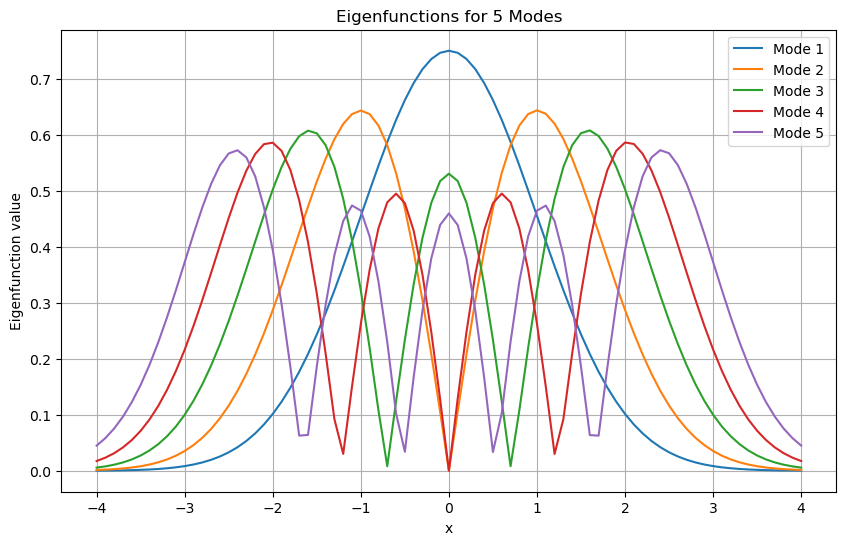

In [2]:
import matplotlib.pyplot as plt

# Plot the 5 eigenfunctions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x_vals, A1[:, i], label=f'Mode {i+1}')

plt.title('Eigenfunctions for 5 Modes')
plt.xlabel('x')
plt.ylabel('Eigenfunction value')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# test size
rows, cols = A1.shape
print(rows,cols)

81 5


In [4]:
# homework 3's A3,A4
# use direct method to find eigenstuffs
import numpy as np
from scipy.sparse.linalg import eigs

# Parameters
dx = 0.1
L = 4
xspan = np.arange(-L + dx, L, dx)
# N = len(xspan)  -> here we know N should be 79

# Matrix A initialization
A = np.zeros((79, 79))

for j in range(79): #diag
    A[j, j] = -2 - (xspan[j]**2 * dx**2)

for i in range(1, 79): #sbdiag
    A[i, i - 1] = 1
    A[i - 1, i] = 1

# Boundary conditions
A[0, 0] = (4/3) -2 - dx**2 * xspan[i]**2
A[0, 1] = 1 - (1/3)
A[78, 77] = 1 - (1/3)
A[78, 78] = (4/3) -2 - dx**2 * xspan[i]**2
A /= dx**2

# A


In [5]:
# Constructing the H matrix and finding eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigs(-A, k=5, which='SM')

# Ensuring eigenvectors are real
eigenvectors = eigenvectors.real

# Extending eigenvectors for boundary conditions
A3 = np.vstack([
    4/3 * eigenvectors[0, :] - 1/3 * eigenvectors[1, :],
    eigenvectors,
    4/3 * eigenvectors[-1, :] - 1/3 * eigenvectors[-2, :]
])

# Adjusted xspan_extended calculation to match the length of A3
xspan_extended = np.linspace(-L, L, len(A3))

# Normalizing eigenvectors
final_A3 = np.zeros((len(A3), 5))
for i in range(5):
    norm = np.sqrt(np.trapz(A3[:, i] ** 2, xspan_extended))
    final_A3[:, i] = np.abs(A3[:, i] / norm)

A3 = final_A3
A4 = eigenvalues.real

print(A3)
print(A4)


[[0.0005253307 0.0029845675 0.0116813848 0.0363684946 0.095195797 ]
 [0.0005655121 0.0031786759 0.0123103575 0.0379292078 0.0982713969]
 [0.0006860563 0.0037610011 0.0141972756 0.0426113473 0.1074981966]
 [0.0008988108 0.0047737038 0.0174256365 0.0504721278 0.1226260023]
 [0.00122563   0.0062968662 0.0221697827 0.0617193919 0.1435655447]
 [0.0016990423 0.0084473956 0.0286805487 0.0766572358 0.170261204 ]
 [0.0023636074 0.0113795761 0.0372731192 0.095634618  0.2025744614]
 [0.0032777843 0.015286208  0.0483140093 0.1189916941 0.2401736967]
 [0.0045161546 0.0203994049 0.0622047465 0.147000883  0.2824308607]
 [0.0061718458 0.0269901636 0.0793603578 0.1798017293 0.3283296881]
 [0.0083589717 0.0353658252 0.1001813015 0.2173306623 0.3763935214]
 [0.0112148676 0.0458645543 0.1250181062 0.25924883   0.4246432929]
 [0.0149018556 0.0588460055 0.1541287717 0.3048732484 0.4705974427]
 [0.0196082237 0.0746774635 0.1876299393 0.3531183919 0.5113251372]
 [0.025548072  0.0937149452 0.2254439564 0.40245

In [6]:
# test size
rows, cols = A3.shape
print(rows,cols)

81 5


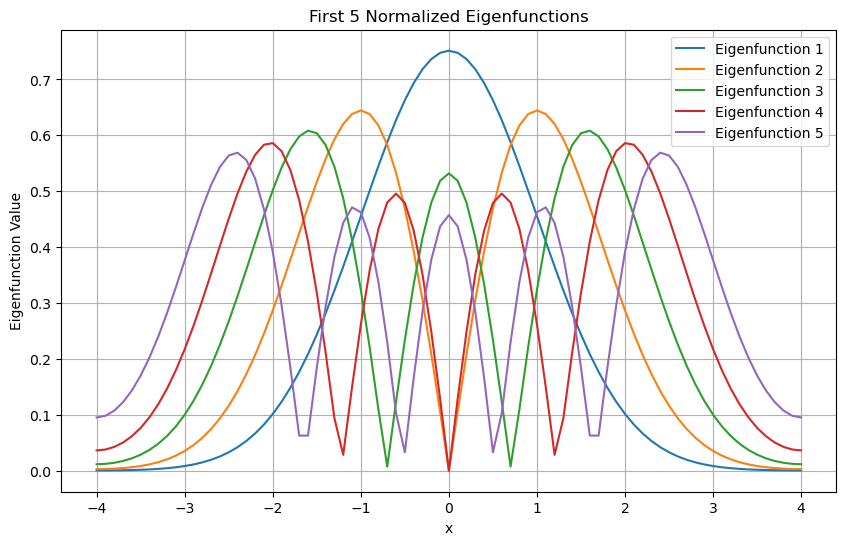

In [7]:
# Define x-axis values for plotting
x_plot = np.linspace(-4, 4, A3.shape[0])

# Plot each eigenfunction
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x_plot, A3[:, i], label=f'Eigenfunction {i+1}')

# My plot
plt.xlabel('x')
plt.ylabel('Eigenfunction Value')
plt.title('First 5 Normalized Eigenfunctions')
plt.legend()
plt.grid(True)
plt.show()

epsilon = 1.0129516601562498
norm = 1.000031243825994
epsilon = 2.9213989257812516
norm = 1.0000794018187271
epsilon = 0.9740478515625
norm = 1.0000702399976142
epsilon = 2.8931396484375016
norm = 1.0000775169733416
A5 (eigenfunctions for gamma = 0.05): [[0.110635094  0.3430073925]
 [0.131428626  0.3803211447]
 [0.1556244682 0.4203320121]
 [0.183289597  0.461704231 ]
 [0.2144000745 0.502901774 ]
 [0.2488212196 0.5422807249]
 [0.2863076082 0.5780892789]
 [0.326503073  0.6084677428]
 [0.3690333768 0.6315706564]
 [0.4132565481 0.6455788858]
 [0.4582591254 0.6485983425]
 [0.5031218582 0.639188452 ]
 [0.5469205903 0.616380314 ]
 [0.5887262592 0.5796767016]
 [0.6276048964 0.5290520621]
 [0.6626176271 0.4650049729]
 [0.6928206705 0.3886912843]
 [0.7172653398 0.30172956  ]
 [0.7351003195 0.2061844373]
 [0.7459343086 0.1045680302]
 [0.7495372494 0.0001600708]
 [0.745847059  0.104716747 ]
 [0.7349760004 0.2062287828]
 [0.7172106828 0.301780958 ]
 [0.6930120614 0.3888199251]
 [0.6630154375 0.4652

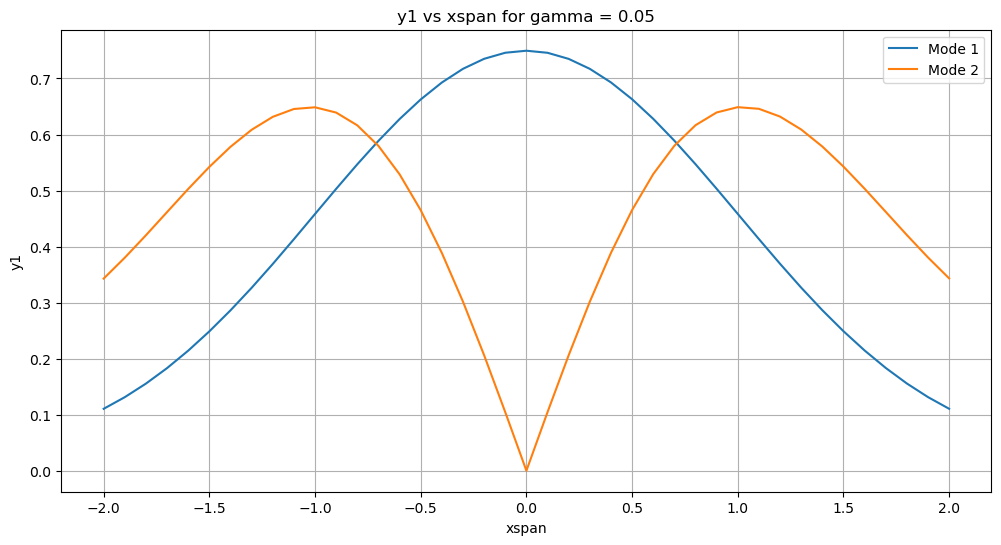

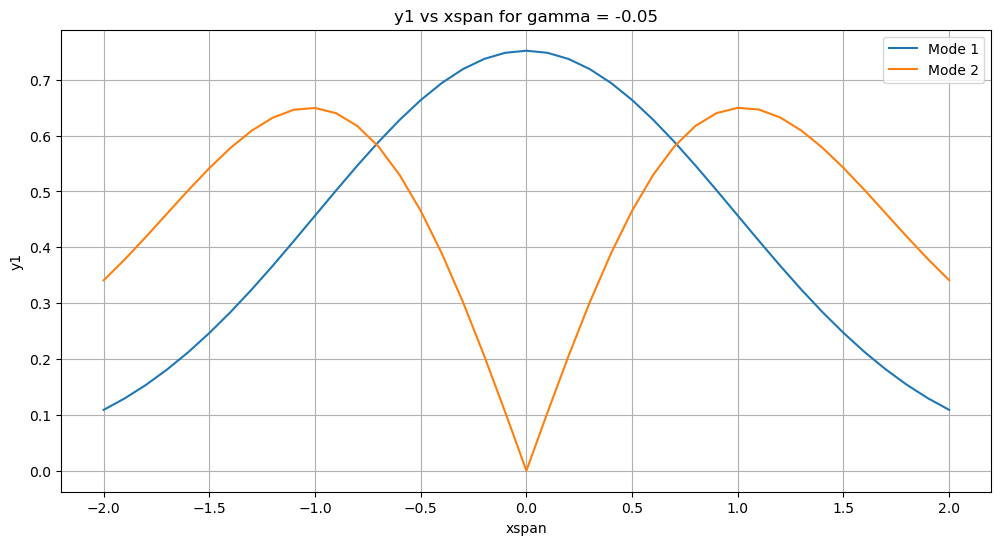

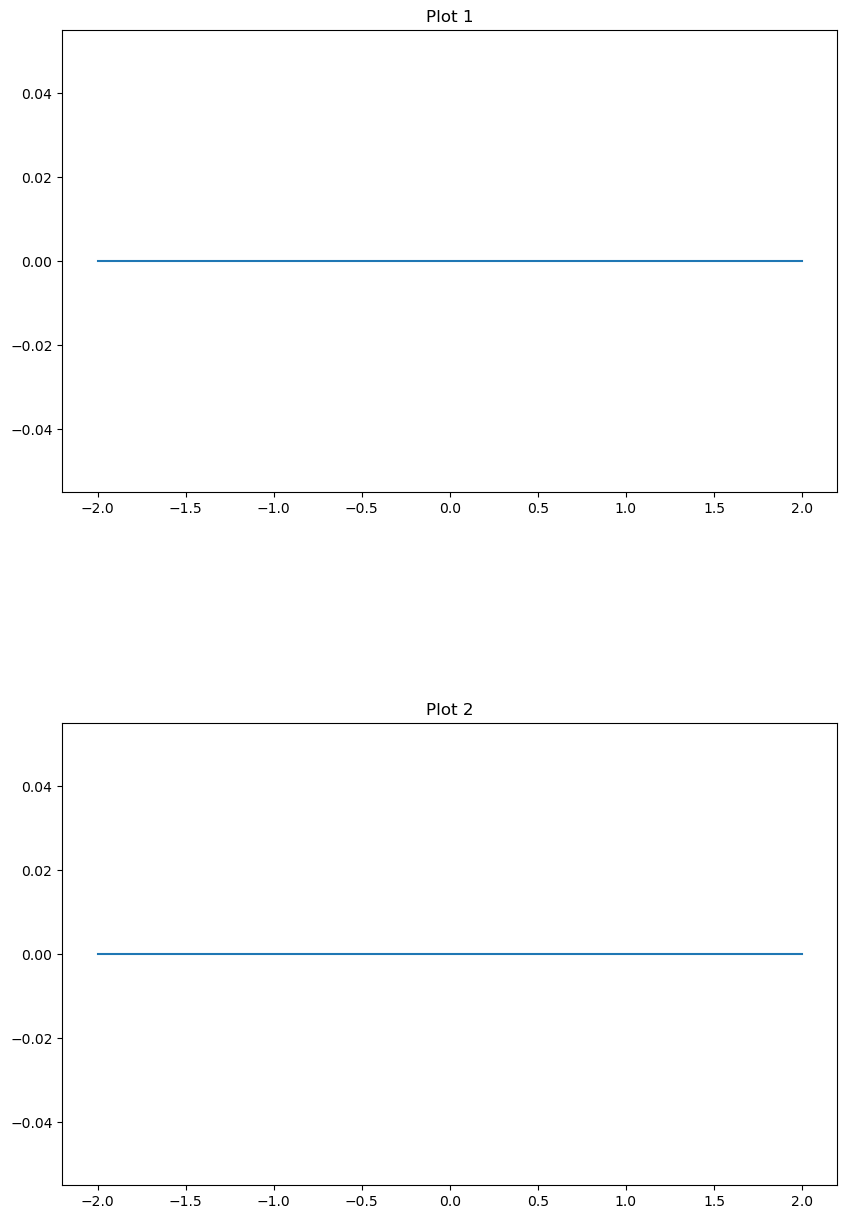

In [18]:
# final version 1102midnight revisedbySean
# A5-A8
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define our rhsfunc2, similar to (a)
def rhsfunc2(x, y, k, gamma, eps):
    f1 = y[1] 
    f2 = (gamma * (abs(y[0])**2) + k * x**2 - eps) * y[0]
    dydt = [f1, f2]
    return dydt

# Variables
L = 2
xspan = np.arange(-L, L + 0.1, 0.1) # timestep
k = 1
tol = 1e-4

# Compute eigenstuffs for \gamma
def compute_eigen(gamma):

    A = 0.1 # launch angle
    eps_start = 0

    eig_vals = []
    eig_vecs = []

    for modes in range(1, 3): # mode 1 and mode 2
        eps = eps_start
        deps = 0.1 # step

        # Inner loop for epsilon shooting
        for i in range(1000):
            yinit = [A, A * np.sqrt(k * L**2 - eps)] # Initial conditions for y1(-L), y2(-L). later one refers to hw2

            # Use py's solver 
            sol = solve_ivp(rhsfunc2, [xspan[0], xspan[-1]], yinit, t_eval=xspan, args=(k, gamma, eps))
            y1 = sol.y[0] # y1 = phi 
            y2 = sol.y[1] # y2 = phi'

            # normalize y1 by trapz
            ynorm = np.trapz(y1**2, xspan)

            A /= np.sqrt(ynorm)                

            # Epsilon shooting adjustment based on boundary condition
            temp = y2[-1] + np.sqrt(L**2 - eps) * y1[-1] # Boundary condition

            if abs(temp) < tol and abs(ynorm - 1) < tol:
                print('epsilon = ' + str(eps))
                #print('A = ' + str(A))
                print('norm = ' + str(ynorm))
                break

            if (-1)**(modes + 1) * temp > 0:
                eps += deps
            else:
                eps -= deps / 2
                deps /= 2

        eig_vals.append(eps)
        eig_vecs.append(np.abs(y1))
        #eig_vecs.append(y1)
        eps_start = eps + 0.1

    return np.column_stack(eig_vecs), np.array(eig_vals)

# Compute results for both gamma values
A5, A6 = compute_eigen(gamma=0.05) # For gamma = 0.05
A7, A8 = compute_eigen(gamma=-0.05) # For gamma = -0.05

# Print results
print("A5 (eigenfunctions for gamma = 0.05):", A5)
print("A6 (eigenvalues for gamma = 0.05):", A6)
print("A7 (eigenfunctions for gamma = -0.05):", A7)
print("A8 (eigenvalues for gamma = -0.05):", A8)

# Plot y1 against xspan for gamma = 0.05
plt.figure(figsize=(12, 6))
for i in range(A5.shape[1]):
    plt.plot(xspan, A5[:, i], label=f'Mode {i+1}')
plt.title('y1 vs xspan for gamma = 0.05')
plt.xlabel('xspan')
plt.ylabel('y1')
plt.legend()
plt.grid(True)
plt.show()

# Plot y1 against xspan for gamma = -0.05
plt.figure(figsize=(12, 6))
for i in range(A7.shape[1]):
    plt.plot(xspan, A7[:, i], label=f'Mode {i+1}')
plt.title('y1 vs xspan for gamma = -0.05')
plt.xlabel('xspan')
plt.ylabel('y1')
plt.legend()
plt.grid(True)
plt.show()

np.savetxt('A5.csv', A5, delimiter=',')
np.savetxt('A7.csv', A7, delimiter=',')
np.savetxt('A1.csv', A1, delimiter=',')
#"""
other_A1 = np.genfromtxt('A5.csv', delimiter=',')
error = A5-other_A1
y_min = -0.0007
y_max = 0.0007
y_ticks = np.linspace(y_min, y_max, 3)
fig, axs = plt.subplots(2, 1, figsize=(10, 15))
for i in range(6,8):
    axs[i-6].plot(xspan, error[:,i-6])
    #axs[i-6].set_ylim(y_min, y_max)  # Set the same y-axis limits for each subplot
    #axs[i-6].set_yticks(y_ticks)
    axs[i-6].set_title(f'Plot {i-6+1}')  # Optionally set a title for each subplot
plt.subplots_adjust(hspace=0.5) 
plt.show()
#"""    

In [19]:
# final version 1025midnight
# A5-A8
"""
import numpy as np
from scipy.integrate import solve_ivp

# Define our rhsfunc2, similar to (a)
def rhsfunc2(x, y, k, gamma, eps):
    f1 = y[1] 
    f2 = (gamma * (abs(y[0])**2) + k * x**2 - eps) * y[0]
    dydt = [f1, f2]
    return dydt

# Variables
L = 2
xspan = np.arange(-L, L + 0.1, 0.1)  # timestep
k = 1
tol = 1e-4

# Compute eigenstuffs for \gamma
def compute_eigen(gamma):

    A = 0.1  # launch angle
    eps_start = 0

    eig_vals = []
    eig_vecs = []

    for modes in range(1, 3):  # mode 1 and mode 2
        eps = eps_start
        deps = 0.1  # step

        # Inner loop for epsilon shooting
        for i in range(1000):
            yinit = [A, A * np.sqrt(k * L**2 - eps)]  # Initial conditions for y1(-L), y2(-L). later one refers to hw2

            # Use py's solver 
            sol = solve_ivp(rhsfunc2, [xspan[0], xspan[-1]], yinit, t_eval=xspan, args=(k, gamma, eps))
            y1 = sol.y[0]  # y1 = phi 
            y2 = sol.y[1]  # y2 = phi'

            # normalize y1 by trapz
            ynorm = np.trapz(y1**2, xspan)

            # Oh no! Adjust A if the norm condition is not met
            if abs(ynorm - 1) < tol:
                break
            else:
                A /= np.sqrt(ynorm)

            # Epsilon shooting adjustment based on boundary condition
            temp = y2[-1] + np.sqrt(L**2 - eps) * y1[-1]  # Boundary condition

            if abs(temp) < tol:
                break

            if (-1)**(modes + 1) * temp > 0:
                eps += deps
            else:
                eps -= deps / 2
                deps /= 2

        eig_vals.append(eps)
        eig_vecs.append(np.abs(y1))
        eps_start = eps + 0.1

    return np.column_stack(eig_vecs), np.array(eig_vals)

# Compute results for both gamma values
A5, A6 = compute_eigen(gamma=0.05)   # For gamma = 0.05
A7, A8 = compute_eigen(gamma=-0.05)  # For gamma = -0.05

# Print results
print("A5 (eigenfunctions for gamma = 0.05):", A5)
print("A6 (eigenvalues for gamma = 0.05):", A6)
print("A7 (eigenfunctions for gamma = -0.05):", A7)
print("A8 (eigenvalues for gamma = -0.05):", A8)
"""

'\nimport numpy as np\nfrom scipy.integrate import solve_ivp\n\n# Define our rhsfunc2, similar to (a)\ndef rhsfunc2(x, y, k, gamma, eps):\n    f1 = y[1] \n    f2 = (gamma * (abs(y[0])**2) + k * x**2 - eps) * y[0]\n    dydt = [f1, f2]\n    return dydt\n\n# Variables\nL = 2\nxspan = np.arange(-L, L + 0.1, 0.1)  # timestep\nk = 1\ntol = 1e-4\n\n# Compute eigenstuffs for \\gamma\ndef compute_eigen(gamma):\n\n    A = 0.1  # launch angle\n    eps_start = 0\n\n    eig_vals = []\n    eig_vecs = []\n\n    for modes in range(1, 3):  # mode 1 and mode 2\n        eps = eps_start\n        deps = 0.1  # step\n\n        # Inner loop for epsilon shooting\n        for i in range(1000):\n            yinit = [A, A * np.sqrt(k * L**2 - eps)]  # Initial conditions for y1(-L), y2(-L). later one refers to hw2\n\n            # Use py\'s solver \n            sol = solve_ivp(rhsfunc2, [xspan[0], xspan[-1]], yinit, t_eval=xspan, args=(k, gamma, eps))\n            y1 = sol.y[0]  # y1 = phi \n            y2 = sol.

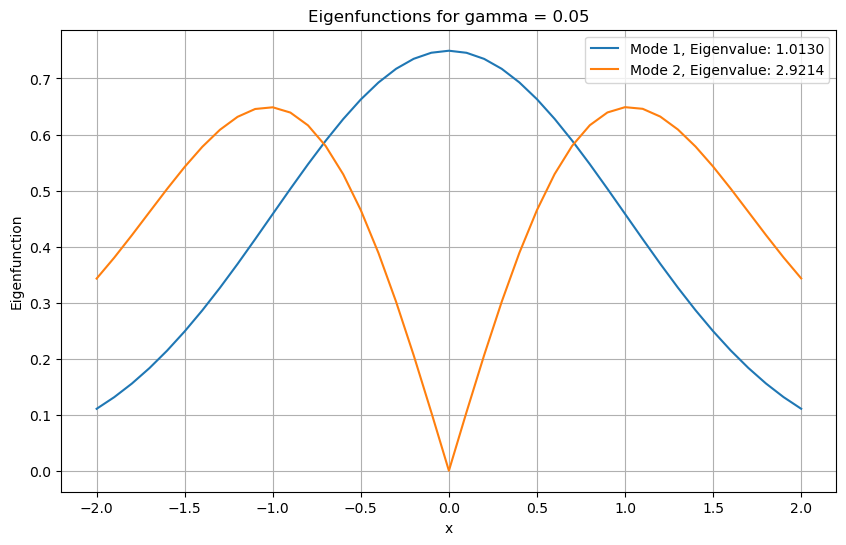

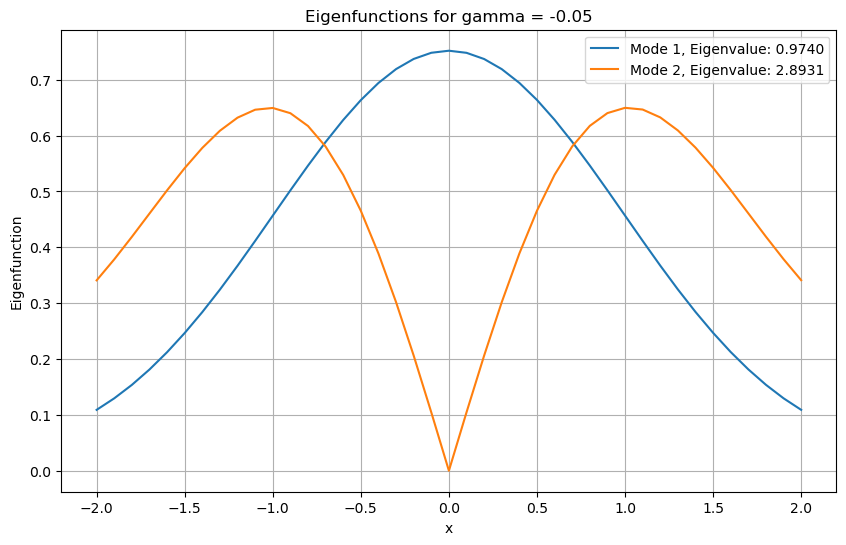

In [20]:
import matplotlib.pyplot as plt

# plot eigenfunction 
def plot_eigenfunctions(xspan, eigfuncs, eigvals, gamma_value):
    plt.figure(figsize=(10, 6))
    for i, (eigfunc, eigval) in enumerate(zip(eigfuncs.T, eigvals), start=1):
        plt.plot(xspan, eigfunc, label=f'Mode {i}, Eigenvalue: {eigval:.4f}')
    
    plt.title(f'Eigenfunctions for gamma = {gamma_value}')
    plt.xlabel('x')
    plt.ylabel('Eigenfunction')
    plt.legend()
    plt.grid()
    plt.show()

# my plot
plot_eigenfunctions(xspan, A5, A6, gamma_value=0.05)  # for gamma = 0.05  
plot_eigenfunctions(xspan, A7, A8, gamma_value=-0.05)  # for gamma = -0.05  


In [21]:
# test size
rows, cols = A7.shape
print(rows,cols)

41 2


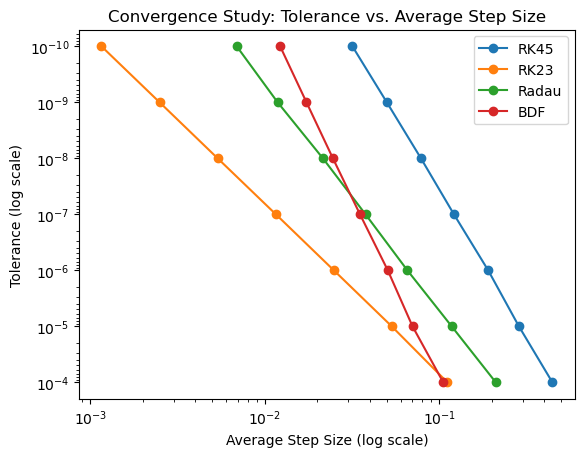

Slope for RK45: 5.244667561772167
Slope for RK23: 3.019099529504503
Slope for Radau: 4.038199269261615
Slope for BDF: 6.457512609631293
A9: [5.2446675618 3.0190995295 4.0381992693 6.4575126096]


In [22]:
# A9 seems to be fine
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

L = 2
K = 1
epsilon = 1   
x_span = [-L, L]
y0 = [1, np.sqrt(K * L**2 - epsilon)]  # initial condition
TOL_values = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# Store average timestep
average_step_sizes = {
    'RK45': [],
    'RK23': [],
    'Radau': [],
    'BDF': []
}

# Define RHS for the differential equation
def hw1_rhs_a(x, y, K, epsilon):
    return [y[1], (K * x**2 - epsilon) * y[0]]

# Solving for different methods and storing average step sizes
for tol in TOL_values:
    options = {'rtol': tol, 'atol': tol}
    
    # RK45
    sol_RK45 = solve_ivp(hw1_rhs_a, x_span, y0, method='RK45', args=(K, epsilon), **options)
    step_sizes_RK45 = np.diff(sol_RK45.t)
    average_step_sizes['RK45'].append(np.mean(step_sizes_RK45))
    
    # RK23
    sol_RK23 = solve_ivp(hw1_rhs_a, x_span, y0, method='RK23', args=(K, epsilon), **options)
    step_sizes_RK23 = np.diff(sol_RK23.t)
    average_step_sizes['RK23'].append(np.mean(step_sizes_RK23))
    
    # Radau
    sol_Radau = solve_ivp(hw1_rhs_a, x_span, y0, method='Radau', args=(K, epsilon), **options)
    step_sizes_Radau = np.diff(sol_Radau.t)
    average_step_sizes['Radau'].append(np.mean(step_sizes_Radau))
    
    # BDF
    sol_BDF = solve_ivp(hw1_rhs_a, x_span, y0, method='BDF', args=(K, epsilon), **options)
    step_sizes_BDF = np.diff(sol_BDF.t)
    average_step_sizes['BDF'].append(np.mean(step_sizes_BDF))

# Plotting with timestep on x-axis and tolerance on y-axis
plt.figure()
for method, steps in average_step_sizes.items():
    plt.loglog(steps, TOL_values, 'o-', label=f"{method}")
plt.ylabel("Tolerance (log scale)")
plt.xlabel("Average Step Size (log scale)")
plt.legend()
plt.title("Convergence Study: Tolerance vs. Average Step Size")
plt.gca().invert_yaxis()  # Inverting y-axis for clarity
plt.show()

# Computing and outputting slopes for the log-log plot
slopes = {}
for method, steps in average_step_sizes.items():
    slope = np.polyfit(np.log(steps), np.log(TOL_values), 1)[0]
    slopes[method] = slope
    print(f"Slope for {method}: {slope}")

# Output slope array
A9 = np.array(list(slopes.values())).reshape(4, 1) 
A9=A9.squeeze()
print("A9:", A9)


In [23]:
import numpy as np
from scipy.special import hermite
from scipy.integrate import quad

# Define custom factorial function
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

# Define variables
K = 1   
L = 4   
n_modes = 5  

# Eigenvalues check
exact_eigenvalues = np.array([2 * n + 1 for n in range(n_modes)])
print("Exact eigenvalues (epsilon_n):", exact_eigenvalues)

# Gauss-Hermite polynomial function
def hermite_function(x, n):
    # Use Python's hermite polynomial
    Hn = hermite(n)
    # Compute psi
    psi_n = np.exp(-x**2 / 2) * Hn(x) / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))
    return psi_n

# Generate points in [-L, L] (e.g., 81 points)
x_vals = np.linspace(-L, L, 81)  

# Compute eigenfunctions for n_modes
exact_eigenfunctions = []
for n in range(n_modes):
    psi_n_vals = hermite_function(x_vals, n)
    # Normalize
    norm_factor = np.sqrt(quad(lambda x: hermite_function(x, n)**2, -L, L)[0])
    psi_n_vals_normalized = psi_n_vals / norm_factor
    exact_eigenfunctions.append(psi_n_vals_normalized)

# Convert to NumPy array
exact_eigenfunctions = np.array(exact_eigenfunctions).T

# Test result
print("Exact eigenfunctions (columns represent different modes):")
print(exact_eigenfunctions)



Exact eigenvalues (epsilon_n): [1 3 5 7 9]
Exact eigenfunctions (columns represent different modes):
[[ 0.0002519746 -0.0014253837  0.0055233835 -0.0168761116  0.0429602898]
 [ 0.000374027  -0.0020629216  0.0077809476 -0.0230936605  0.0569616116]
 [ 0.0005496755 -0.0029539632  0.0108364234 -0.0312113076  0.0744990821]
 [ 0.0007997731 -0.0041848861  0.014918612  -0.0416543106  0.0960842055]
 [ 0.0011520844 -0.0058654576  0.0203010805 -0.0548856897  0.122165546 ]
 [ 0.0016430805 -0.0081328355  0.027303198  -0.0713876453  0.153068476 ]
 [ 0.0023200131 -0.0111553822  0.036287945  -0.0916336619  0.1889232065]
 [ 0.00324324   -0.0151358958  0.0476553262 -0.1160503162  0.2295844339]
 [ 0.0044887435 -0.0203137393  0.0618301873 -0.1449685896  0.2745482873]
 [ 0.0061507426 -0.0269652438  0.0792433349 -0.1785656062  0.3228747465]
 [ 0.0083442511 -0.0354016684  0.1003051219 -0.2167991622  0.3731260139]
 [ 0.0112073836 -0.0459639501  0.1253711299 -0.2593390998  0.4233330472]
 [ 0.0149031532 -0.0590

In [24]:
# test size
rows, cols = exact_eigenfunctions.shape
print(rows,cols)

81 5


In [25]:
import numpy as np

L = 4
x_vals = np.linspace(-L, L, A1.shape[0])  
n_modes = 5   

A10 = [np.trapz((np.abs(A1[:, i]) - np.abs(exact_eigenfunctions[:, i]))**2, x_vals) for i in range(n_modes)]
A12 = [np.trapz((np.abs(A3[:, i]) - np.abs(exact_eigenfunctions[:, i]))**2, x_vals) for i in range(n_modes)]

A11 = np.array([[100 * np.abs((A2[i] - exact_eigenvalues[i]) / exact_eigenvalues[i])] for i in range(n_modes)])
A11 = A11.squeeze()
A13 = np.array([[100 * np.abs((A4[i] - exact_eigenvalues[i]) / exact_eigenvalues[i])] for i in range(n_modes)])
A13 = A13.squeeze()

print("A10:", A10)
print("A11:", A11)
print("A12:", A12)
print("A13:", A13)
print("A2:", A2)

np.savetxt('A10.csv', A10, delimiter=',')
np.savetxt('A11.csv', A11, delimiter=',')
np.savetxt('A12.csv', A12, delimiter=',')
np.savetxt('A13.csv', A13, delimiter=',')




A10: [4.5769277617394695e-08, 1.7243094348607435e-07, 2.4784234988168435e-07, 4.335189311786564e-07, 1.8710577574381288e-06]
A11: [0.0264208855 0.0332466059 0.030738889  0.0345570692 0.0416194327]
A12: [2.3390858049650498e-07, 2.3972037559845986e-06, 1.8127656623532807e-05, 0.0001530526257250334, 0.0012426625762963924]
A13: [0.0626477037 0.1053667337 0.171868804  0.2801621354 0.5488885888]
A2: [0.9997357911 2.9990026018 4.9984630555 6.9975810052 8.9962542511]
